In [39]:
# imports
%matplotlib inline
import csv
import numpy as np
from statistics import mean
from sklearn.decomposition import PCA
from sklearn import svm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import seaborn as sb
import sklearn.metrics

In [58]:
# extract data from CSV file
data = []
with open('data.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    next(readCSV)
    next(readCSV)
    for row in readCSV:
        vals = [float(i) for i in row[1:-1]]
        m = mean(vals)
        sd = np.std(vals)
        vals = [(i-m)/sd for i in vals]
        data.append(vals)
labels = ['Normal' for i in range(108)] + ['Tumor' for i in range(1038)]
print(len(data), len(labels))

# first 108 samples in CSV are normal tissue, next 1038 tumor tissue
normal_tissue = data[:108]
tumor = data[108:]

1146 1146


In [66]:
# apply PCA to data and get first 3 principal components
X = np.array(data)
pca = PCA(n_components=20)
tf_X = pca.fit_transform(X)

# first 108 samples are normal tissue, next 1038 tumor tissue for transformed data
tf_normal = tf_X[:108]
tf_tumor = tf_X[108:]

# 80% training, 20% testing for PCA + SVM
x_tr_ps = np.concatenate((tf_normal[:86], tf_tumor[:830]))
y_tr_ps = ['Normal' for i in range(86)] + ['Tumor' for i in range(830)]
print(len(x_tr_ps), len(y_tr_ps))
x_te_ps = np.concatenate((tf_normal[86:], tf_tumor[830:]))
y_te_ps = ['Normal' for i in range(22)] + ['Tumor' for i in range(208)]
print(len(x_te_ps), len(y_te_ps))

916 916
230 230


In [60]:
# function for SVM + accuracy
def perform_SVM(x_tr, y_tr, x_te, y_te, kernel):
    clf = svm.SVC(gamma='auto', kernel=kernel)
    clf.fit(x_tr, y_tr)
    correct = 0
    predictions = []
    for i in range(len(x_te)):
        prediction = clf.predict([x_te[i]])
        predictions.append(prediction)
        if prediction == y_te[i]:
            correct += 1
    return correct/len(x_te), predictions

def false_positive_ratio_ps(actual, pred):
    # false positive = classified as tumor when it is actually normal
    # condition negative = actually normal
    fp = 0
    cn = 0
    for i in range(len(actual)):
        if actual[i] == 'Normal':
            cn += 1
            if pred[i] == 'Tumor':
                fp += 1
    return fp/cn

def false_negative_ratio_ps(actual, pred):
    # false negative = classified as normal when it is actually tumor
    # condition positive = tumor
    fn = 0
    cp = 0
    for i in range(len(actual)):
        if actual[i] == 'Tumor':
            cp += 1
            if pred[i] == 'Normal':
                fn += 1
    return fn/cp

def true_positive_ratio_ps(actual, pred):
    # true positive = classified as tumor
    # condition positive = actually tumor
    tp = 0
    cp = 0
    for i in range(len(actual)):
        if actual[i] == 'Tumor':
            cp += 1
            if pred[i] == 'Tumor':
                tp += 1
    return tp/cp

def true_negative_ratio_ps(actual, pred):
    # true negative = classified as normal
    # condition negative = actually normal
    tn = 0
    cn = 0
    for i in range(len(actual)):
        if actual[i] == 'Normal':
            cn += 1
            if pred[i] == 'Normal':
                tn += 1
    return tn/cn

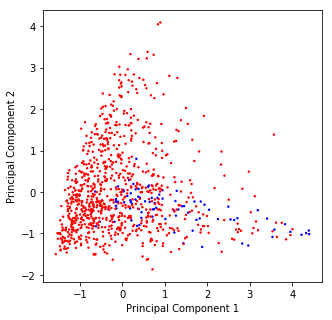

Accuracy of SVM with radial basis function kernel: 0.9
FP, FN, TP, TN Ratios: 1.0 0.004807692307692308 0.9951923076923077 0.0
Accuracy of SVM with linear kernel: 0.9043478260869565
FP, FN, TP, TN Ratios: 1.0 0.0 1.0 0.0


In [61]:
# PC1 vs PC2

# plot
label_color_dict = {'Tumor': 'red', 'Normal': 'blue'}
cvec_ps = [label_color_dict[label] for label in y_tr_ps]
plt.figure(figsize=(5,5))
plt.scatter(x_tr_ps[:,0], x_tr_ps[:,1], c=cvec_ps, s=2)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# SVM with rbf kernel
acc_rbf_12, pred_rbf_12 = perform_SVM(x_tr_ps[:,[0,1]], y_tr_ps, x_te_ps[:,[0,1]], y_te_ps, kernel='rbf')
print("Accuracy of SVM with radial basis function kernel:", acc_rbf_12)
print("FP, FN, TP, TN Ratios:", false_positive_ratio_ps(y_te_ps, pred_rbf_12), 
      false_negative_ratio_ps(y_te_ps, pred_rbf_12),
      true_positive_ratio_ps(y_te_ps, pred_rbf_12), 
      true_negative_ratio_ps(y_te_ps, pred_rbf_12))

# SVM with linear kernel
acc_lin_12, pred_lin_12 = perform_SVM(x_tr_ps[:,[0,1]], y_tr_ps, x_te_ps[:,[0,1]], y_te_ps, kernel='linear')
print("Accuracy of SVM with linear kernel:", acc_lin_12)
print("FP, FN, TP, TN Ratios:", false_positive_ratio_ps(y_te_ps, pred_lin_12),
      false_negative_ratio_ps(y_te_ps, pred_lin_12),
      true_positive_ratio_ps(y_te_ps, pred_lin_12), 
      true_negative_ratio_ps(y_te_ps, pred_lin_12))

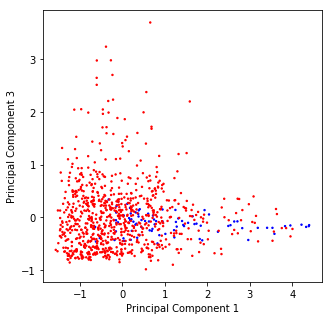

Accuracy of SVM with radial basis function kernel: 0.9
FP, FN, TP, TN Ratios: 1.0 0.004807692307692308 0.9951923076923077 0.0
Accuracy of SVM with linear kernel: 0.9043478260869565
FP, FN, TP, TN Ratios: 1.0 0.0 1.0 0.0


In [62]:
# PC1 vs PC3

# plot
plt.figure(figsize=(5,5))
plt.scatter(x_tr_ps[:,0], x_tr_ps[:,2], c=cvec_ps, s=2)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")
plt.show()

# SVM with rbf kernel
acc_rbf_13, pred_rbf_13 = perform_SVM(x_tr_ps[:,[0,2]], y_tr_ps, x_te_ps[:,[0,2]], y_te_ps, kernel='rbf')
print("Accuracy of SVM with radial basis function kernel:", acc_rbf_13)
print("FP, FN, TP, TN Ratios:", false_positive_ratio_ps(y_te_ps, pred_rbf_13), 
      false_negative_ratio_ps(y_te_ps, pred_rbf_13),
      true_positive_ratio_ps(y_te_ps, pred_rbf_13), 
      true_negative_ratio_ps(y_te_ps, pred_rbf_13))

# SVM with linear kernel
acc_lin_13, pred_lin_13 = perform_SVM(x_tr_ps[:,[0,2]], y_tr_ps, x_te_ps[:,[0,2]], y_te_ps, kernel='linear')
print("Accuracy of SVM with linear kernel:", acc_lin_13)
print("FP, FN, TP, TN Ratios:", false_positive_ratio_ps(y_te_ps, pred_lin_13),
      false_negative_ratio_ps(y_te_ps, pred_lin_13),
      true_positive_ratio_ps(y_te_ps, pred_lin_13), 
      true_negative_ratio_ps(y_te_ps, pred_lin_13))

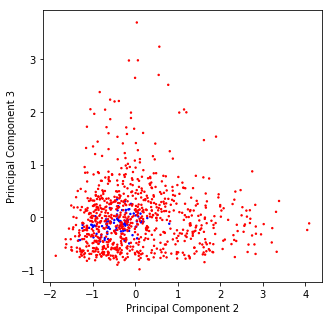

Accuracy of SVM with radial basis function kernel: 0.9043478260869565
FP, FN, TP, TN Ratios: 1.0 0.0 1.0 0.0
Accuracy of SVM with linear kernel: 0.9043478260869565
FP, FN, TP, TN Ratios: 1.0 0.0 1.0 0.0


In [63]:
# PC2 vs PC3

# plot
plt.figure(figsize=(5,5))
plt.scatter(x_tr_ps[:,1], x_tr_ps[:,2], c=cvec_ps, s=2)
plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 3")
plt.show()

# SVM with rbf kernel
acc_rbf_23, pred_rbf_23 = perform_SVM(x_tr_ps[:,[1,2]], y_tr_ps, x_te_ps[:,[1,2]], y_te_ps, kernel='rbf')
print("Accuracy of SVM with radial basis function kernel:", acc_rbf_23)
print("FP, FN, TP, TN Ratios:", false_positive_ratio_ps(y_te_ps, pred_rbf_23), 
      false_negative_ratio_ps(y_te_ps, pred_rbf_23),
      true_positive_ratio_ps(y_te_ps, pred_rbf_23), 
      true_negative_ratio_ps(y_te_ps, pred_rbf_23))

# SVM with linear kernel
acc_lin_23, pred_lin_23 = perform_SVM(x_tr_ps[:,[1,2]], y_tr_ps, x_te_ps[:,[1,2]], y_te_ps, kernel='linear')
print("Accuracy of SVM with linear kernel:", acc_lin_23)
print("FP, FN, TP, TN Ratios:", false_positive_ratio_ps(y_te_ps, pred_lin_23),
      false_negative_ratio_ps(y_te_ps, pred_lin_23),
      true_positive_ratio_ps(y_te_ps, pred_lin_23), 
      true_negative_ratio_ps(y_te_ps, pred_lin_23))

In [67]:
# 3D (PC1, PC2, PC3)

# plot
#fig = plt.figure()
#ax = Axes3D(fig)
#ax.scatter(x_tr_ps[:,0], x_tr_ps[:,1], x_tr_ps[:,2], c=cvec_ps, s=2)
#ax.set_xlabel("Principal Component 1", fontsize=10)
#ax.set_ylabel("Principal Component 2", fontsize=10)
#ax.set_zlabel("Principal Component 3", fontsize=10)
#plt.show()

# SVM with rbf kernel
acc_rbf, pred_rbf = perform_SVM(x_tr_ps, y_tr_ps, x_te_ps, y_te_ps, kernel='rbf')
print("Accuracy of SVM with radial basis function kernel:", acc_rbf)
print("FP, FN, TP, TN Ratios:", false_positive_ratio_ps(y_te_ps, pred_rbf), 
      false_negative_ratio_ps(y_te_ps, pred_rbf),
      true_positive_ratio_ps(y_te_ps, pred_rbf), 
      true_negative_ratio_ps(y_te_ps, pred_rbf))

# SVM with linear kernel
acc_lin, pred_lin = perform_SVM(x_tr_ps, y_tr_ps, x_te_ps, y_te_ps, kernel='linear')
print("Accuracy of SVM with linear kernel:", acc_lin)
print("FP, FN, TP, TN Ratios:", false_positive_ratio_ps(y_te_ps, pred_lin),
      false_negative_ratio_ps(y_te_ps, pred_lin),
      true_positive_ratio_ps(y_te_ps, pred_lin), 
      true_negative_ratio_ps(y_te_ps, pred_lin))

Accuracy of SVM with radial basis function kernel: 0.9652173913043478
FP, FN, TP, TN Ratios: 0.22727272727272727 0.014423076923076924 0.9855769230769231 0.7727272727272727
Accuracy of SVM with linear kernel: 0.9608695652173913
FP, FN, TP, TN Ratios: 0.22727272727272727 0.019230769230769232 0.9807692307692307 0.7727272727272727


In [9]:
# 70% training, 10% validation, 20% testing for neural net
# index 0 is 1 for normal and index 2 is 1 for tumor
x_tr_nn = np.concatenate((normal_tissue[:75], tumor[:726]))
y_tr_nn = np.concatenate(([[1,0] for i in range(75)], [[0,1] for i in range(726)]))
print(len(x_tr_nn), len(y_tr_nn))
x_va_nn = np.concatenate((normal_tissue[75:86],tumor[726:830]))
y_va_nn = np.concatenate(([[1,0] for i in range(11)], [[0,1] for i in range(104)]))
print(len(x_va_nn), len(y_va_nn))
x_te_nn = np.concatenate((normal_tissue[86:], tumor[830:]))
y_te_nn = np.concatenate(([[1,0] for i in range(22)], [[0,1] for i in range(208)]))
print(len(x_te_nn), len(y_te_nn))

801 801
115 115
230 230


In [10]:
# CNN implementations, input data is (?, 21)
# cnn_model based on model from pset 3
# cnn_model_conv adds 3 convolutional layers

def cnn_model(x_ph, dropout_rate):
    
    ################################################################################ 
    # Implement a NN with the required structure and initialize all the variables:
    # Arguments:
    # - x_ph: RNA-seq input data / placeholder of shape [?, 21]
    # - dropout_rate: dropout rate (1 - keep probability) of dropout layer
    # Return values:
    # - y_hat_op: class probabilities operator (our predicted y, sigmoid(z_op)) of shape [?, 2]
    # - z_op: unscaled log probabilities operator (output of last matrix multiplication,
    #      before activation function) of shape [?, 2]
    # - weights: a list of all tf.Variable weight matrices
    ################################################################################
    # Building neural network with 3 fully connected layers with ReLU and dropout
    # size of fully connected layer: 
    fc_units1=21
    fc_units2=16
    fc_units3=8
    input_dim=21
    ################################################################################
    #                            BEGINNING OF YOUR CODE                            #
    ################################################################################
    
    # 1. fully connected layer w/4 neurons
    W_fc1 = tf.Variable(tf.truncated_normal([input_dim, fc_units1], stddev=np.sqrt(2/(input_dim+fc_units1))))
    b_fc1 = tf.Variable(tf.constant(0.0, shape=[fc_units1]))
    fc1 = tf.matmul(x_ph, W_fc1)
    fc1 = tf.nn.bias_add(fc1, b_fc1)
    fc1 = tf.nn.relu(fc1)
    
    # 2. dropout layer
    dropout1 = tf.nn.dropout(fc1, rate = dropout_rate)
    
    # 3. fully connected layer w/4 neurons
    W_fc2 = tf.Variable(tf.truncated_normal([fc_units1, fc_units2], stddev=np.sqrt(2/(fc_units1+fc_units2))))
    b_fc2 = tf.Variable(tf.constant(0.0, shape=[fc_units2]))
    fc2 = tf.matmul(dropout1, W_fc2)
    fc2 = tf.nn.bias_add(fc2, b_fc2)
    fc2 = tf.nn.relu(fc2)
    
    # 4. dropout layer
    dropout2 = tf.nn.dropout(fc2, rate = dropout_rate)
    
    # 5. fully connected layer w/8 neurons
    W_fc3 = tf.Variable(tf.truncated_normal([fc_units2, fc_units3], stddev=np.sqrt(2/(fc_units2+fc_units3))))
    b_fc3 = tf.Variable(tf.constant(0.0, shape=[fc_units3]))
    fc3 = tf.matmul(dropout2, W_fc3)
    fc3 = tf.nn.bias_add(fc3, b_fc3)
    fc3 = tf.nn.relu(fc3)
    
    # 6. dropout layer
    dropout3 = tf.nn.dropout(fc3, rate = dropout_rate)
    
    # 7. fully connected layer w/2 neurons
    W_fc4 = tf.Variable(tf.truncated_normal([fc_units3, 2], stddev=np.sqrt(2/(fc_units3+2))))
    b_fc4 = tf.Variable(tf.constant(0.0, shape=[2]))
    fc4 = tf.matmul(dropout3, W_fc4)
    z_op = tf.nn.bias_add(fc4, b_fc4)
    
    #8. softmax
    y_hat_op = tf.nn.softmax(z_op, name="y_hat_op")
    
    weights = [W_fc1, W_fc2, W_fc3, W_fc4]
    
    ################################################################################
    #                               END OF YOUR CODE                               #
    ################################################################################
    
    return y_hat_op, z_op, weights

In [11]:
# cross entropy loss

def cnn_loss(z_op, y_ph, weights, l2_coefficient):
    ################################################################################ 
    # Arguments:
    # - z_op: unscaled log probabilities (output of last layer) of shape [?, 2]
    # - y_ph: labels / placeholder of shape [?, 2]
    # - weights: list of all weight tf.Variables
    # - l2_coefficient: coefficient lambda for L2 regularization of weights
    # Return values:
    # - loss_op: the loss operator
    ################################################################################
    #                            BEGINNING OF YOUR CODE                            #
    ################################################################################
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y_ph, z_op))
    l2_reg = sum([tf.nn.l2_loss(w) for w in weights])
    loss_op = loss + l2_coefficient*l2_reg
    
    ################################################################################
    #                               END OF YOUR CODE                               #
    ################################################################################
    return loss_op

In [12]:
# training loop

def training(x_train, y_train, x_val, y_val, hyperparam_config, num_epochs, batch_size,
             save_model=True, model_dir='models/best_model'): 
    ################################################################################
    # Arguments:
    # - x_train: input training set
    # - y_train: label training set
    # - x_val: input validation set
    # - y_val: label validation set
    # - hyperparam_config: a dictionary that stores a hyperparameter configuration,
    #                      including:
    #                      - "dropout_rate": dropout rate (1 - keep probability),
    #                      - "l2": coefficient lambda for L2 regularization,
    #                      - "lr": learning rate for RMSProp optimizer
    # - num_epochs: number of epochs to train
    # - batch_size: training mini-batch size
    # - best_model_dir: location where model will be saved
    # Return values:
    # - best_loss: best validation loss
    ################################################################################
    tf.reset_default_graph()
    
    # define input and output placeholders
    # TF uses NHWC: the data is stored in the order of [batch, in_height, in_width, in_channels]
    # DNA is one-dimensional (height = 1, width = 101) with four channels for the four bases A, C, G, T
    x_ph = tf.placeholder("float", [None, 21], name="x_ph")
    y_ph = tf.placeholder("float", [None, 2], name="y_ph")

    # model
    y_hat_op, z_op, weights = cnn_model(x_ph, hyperparam_config['dropout_rate'])
    
    # loss
    loss_op = cnn_loss(z_op, y_ph, weights, hyperparam_config['l2'])

    # optimizer
    optimizer_op = tf.train.RMSPropOptimizer(hyperparam_config['lr'], 0.9).minimize(loss_op)
     
    # Implement training loop
    # - loop through training data num_epochs times
    # - after each epoch, calculate loss on validation set (x_val, y_val)
    # - if save_model: save model with lowest validation loss to disk (model_dir)
    # - (delete previous best model)
    # - return lowest validation loss
    ################################################################################
    #                            BEGINNING OF YOUR CODE                            #
    ################################################################################
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    
    best_loss = float('inf')
    for epoch in range(num_epochs):
        total_batch = int(x_train.shape[0] / batch_size)

        for step in range(total_batch):
            offset = (step * batch_size) % (x_train.shape[0] - batch_size)
            batch_x = x_train[offset:(offset + batch_size), :]
            batch_y = y_train[offset:(offset + batch_size)]

            _, batch_loss = sess.run([optimizer_op, loss_op], feed_dict = {x_ph: batch_x, y_ph: batch_y})
            
        loss_val = sess.run([loss_op], feed_dict = {x_ph: x_val, y_ph: y_val})
        print("epoch", str(epoch + 1) + ": loss =", loss_val[0])
        if save_model and loss_val[0] < best_loss:
            best_loss = loss_val[0]
            tf.gfile.DeleteRecursively(model_dir)
            tf.saved_model.simple_save(sess, model_dir, inputs={'x_ph': x_ph, 'y_ph': y_ph}, outputs={'y_hat_op': y_hat_op, 'loss_op': loss_op})

    print("best loss:", best_loss)
    sess.close()
    ################################################################################
    #                               END OF YOUR CODE                               #
    ################################################################################
    return best_loss

In [13]:
def subsample_set(x, y, n):
    ################################################################################ 
    # Draws n examples without replacement from sets x, y
    # Arguments:
    # - x: input set
    # - y: label set
    # - n: number of examples drawn
    # Return values:
    # - x_subset: randomly selected x
    # - y_subset: corresponding labels of randomly selected x
    ################################################################################
    idx = np.arange(len(x))
    np.random.shuffle(idx)
    idx = idx[0 : n]
    return x[idx], y[idx]

In [14]:
def grid_search(x_train, y_train, x_val, y_val, dropout_rates, l2_lambdas, learning_rates,
                num_training, num_validation, num_epochs=5, batch_size=128):
    ################################################################################ 
    # Arguments:
    # - x_train: input training set
    # - y_train: label training set
    # - x_val: input validation set
    # - y_val: label validation set
    # - dropout_rates: dropout rates to try
    # - l2_lambdas: L2 lambda coefficients to try
    # - learning_rates: learning rates to try
    # - num_training: number of training examples used per model
    # - num_validation: number of validation examples used per model
    # - num_epochs: number of epochs to train
    # - batch_size: training mini-batch size
    # Return values:
    # - losses: losses for configurations tested
    ################################################################################
    losses = []
    
    pbar = tqdm(total = len(dropout_rates) * len(l2_lambdas) * len(learning_rates))
    for dropout_rate in dropout_rates:
        for l2_lambda in l2_lambdas:
            for learning_rate in learning_rates:
                # subsample training and validation sets
                subset_x_train, subset_y_train = subsample_set(x_train, y_train, num_training)
                subset_x_val, subset_y_val = subsample_set(x_val, y_val, num_validation)
                
                hyperparam_config = {'dropout_rate': dropout_rate,
                                     'l2': l2_lambda,
                                     'lr': learning_rate}
                
                best_loss = training(subset_x_train, subset_y_train,
                                     subset_x_val, subset_y_val,
                                     hyperparam_config,
                                     num_epochs,
                                     batch_size,
                                     save_model = True)
                
                losses.append([dropout_rate, l2_lambda, learning_rate, best_loss])
                pbar.update(1)
    pbar.close()
    return losses

In [26]:
# hyperparameter values to test
dropout_rates = [0.2, 0.5, 0.8]
l2_lambdas = [1e-03, 1e-06, 0]
learning_rates = [1e-1, 1e-3, 1e-5]

# static hyperparameters
num_training = 200
num_validation = 29
batch_size = 32
num_epochs = 100

In [27]:
param_result = grid_search(x_tr_nn, y_tr_nn, x_va_nn, y_va_nn, dropout_rates, l2_lambdas, learning_rates,
                           num_training, num_validation, num_epochs, batch_size)
df = pd.DataFrame(param_result,
                  columns = ['dropout rate', 
                             'L2 lambda',
                             'learning rate',
                             'validation loss']).pivot_table(values = ['validation loss'],
                                                             columns = ['L2 lambda'],
                                                             index = ['dropout rate', 'learning rate'])
df = df.round(3)
(df.style.background_gradient(cmap=sb.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)))

epoch 1: loss = 0.52426004
epoch 2: loss = 0.29832476
epoch 3: loss = 0.27053833
epoch 4: loss = 0.21120156
epoch 5: loss = 0.53350717
epoch 6: loss = 0.53404635
epoch 7: loss = 0.34510237
epoch 8: loss = 0.26020375
epoch 9: loss = 0.2591928
epoch 10: loss = 0.28760245
epoch 11: loss = 0.3570625
epoch 12: loss = 0.3538994
epoch 13: loss = 0.3558516
epoch 14: loss = 0.6073382
epoch 15: loss = 0.3535943
epoch 16: loss = 0.3534657
epoch 17: loss = 0.35163435
epoch 18: loss = 0.34925145
epoch 19: loss = 0.3467729
epoch 20: loss = 0.34434584
epoch 21: loss = 0.3427902
epoch 22: loss = 0.34160498
epoch 23: loss = 0.33199242
epoch 24: loss = 0.33407015
epoch 25: loss = 0.330526
epoch 26: loss = 0.29432395
epoch 27: loss = 0.29205725
epoch 28: loss = 0.261636
epoch 29: loss = 0.22130637
epoch 30: loss = 1.582791
epoch 31: loss = 0.3368998
epoch 32: loss = 0.34043288
epoch 33: loss = 0.34159222
epoch 34: loss = 0.3409206
epoch 35: loss = 0.3407903
epoch 36: loss = 0.3407004
epoch 37: loss = 0.3

best loss: 10.226224
epoch 1: loss = 0.28723577
epoch 2: loss = 0.24295817
epoch 3: loss = 0.34392998
epoch 4: loss = 0.29749596
epoch 5: loss = 0.22860247
epoch 6: loss = 0.28585583
epoch 7: loss = 0.56541544
epoch 8: loss = 0.37457192
epoch 9: loss = 0.40235355
epoch 10: loss = 0.42563978
epoch 11: loss = 0.3985718
epoch 12: loss = 0.3917648
epoch 13: loss = 0.3945046
epoch 14: loss = 0.38549456
epoch 15: loss = 0.40255022
epoch 16: loss = 0.40554795
epoch 17: loss = 0.4059906
epoch 18: loss = 0.40339014
epoch 19: loss = 0.35166913
epoch 20: loss = 0.4038795
epoch 21: loss = 0.40599534
epoch 22: loss = 0.40624574
epoch 23: loss = 0.40650237
epoch 24: loss = 0.40276843
epoch 25: loss = 0.40388647
epoch 26: loss = 0.40647963
epoch 27: loss = 1.0192915
epoch 28: loss = 0.40873444
epoch 29: loss = 0.39368707
epoch 30: loss = 0.4063484
epoch 31: loss = 0.40618104
epoch 32: loss = 0.4063113
epoch 33: loss = 0.4064005
epoch 34: loss = 0.40636414
epoch 35: loss = 0.3911652
epoch 36: loss = 0

epoch 1: loss = 0.37623903
epoch 2: loss = 0.8497857
epoch 3: loss = 0.36293614
epoch 4: loss = 0.5525034
epoch 5: loss = 0.37019446
epoch 6: loss = 0.39722997
epoch 7: loss = 0.40050387
epoch 8: loss = 0.41372687
epoch 9: loss = 0.42125574
epoch 10: loss = 0.4249112
epoch 11: loss = 0.4749336
epoch 12: loss = 0.4570908
epoch 13: loss = 0.44618744
epoch 14: loss = 0.43628007
epoch 15: loss = 0.42925197
epoch 16: loss = 0.42706975
epoch 17: loss = 0.4362226
epoch 18: loss = 0.4393866
epoch 19: loss = 0.44014302
epoch 20: loss = 0.43490016
epoch 21: loss = 0.43352145
epoch 22: loss = 0.43930987
epoch 23: loss = 0.44028676
epoch 24: loss = 0.43007448
epoch 25: loss = 0.42869237
epoch 26: loss = 0.4325411
epoch 27: loss = 0.45194113
epoch 28: loss = 0.43295366
epoch 29: loss = 0.42898867
epoch 30: loss = 0.4284414
epoch 31: loss = 0.42883304
epoch 32: loss = 0.4284952
epoch 33: loss = 0.42847446
epoch 34: loss = 0.42848387
epoch 35: loss = 0.42849106
epoch 36: loss = 0.4284948
epoch 37: lo

epoch 1: loss = 0.5947039
epoch 2: loss = 0.38044378
epoch 3: loss = 0.3033194
epoch 4: loss = 0.4263569
epoch 5: loss = 0.40192878
epoch 6: loss = 0.35204518
epoch 7: loss = 0.56402004
epoch 8: loss = 0.35643387
epoch 9: loss = 0.48320147
epoch 10: loss = 0.34188193
epoch 11: loss = 0.35387704
epoch 12: loss = 0.36553773
epoch 13: loss = 0.5652788
epoch 14: loss = 0.36762074
epoch 15: loss = 0.3691023
epoch 16: loss = 0.35439107
epoch 17: loss = 0.35532376
epoch 18: loss = 0.3618025
epoch 19: loss = 0.3618699
epoch 20: loss = 0.35984513
epoch 21: loss = 0.35874522
epoch 22: loss = 0.35695305
epoch 23: loss = 0.3562004
epoch 24: loss = 0.35572073
epoch 25: loss = 0.35538355
epoch 26: loss = 0.35513046
epoch 27: loss = 0.3549382
epoch 28: loss = 0.35479236
epoch 29: loss = 0.35468435
epoch 30: loss = 0.3546073
epoch 31: loss = 0.35455555
epoch 32: loss = 0.35452428
epoch 33: loss = 0.35450852
epoch 34: loss = 0.35450262
epoch 35: loss = 0.35450116
epoch 36: loss = 0.35450098
epoch 37: l

epoch 1: loss = 0.3510877
epoch 2: loss = 0.2788723
epoch 3: loss = 0.39944917
epoch 4: loss = 0.36680013
epoch 5: loss = 0.30108443
epoch 6: loss = 0.29712006
epoch 7: loss = 0.4126755
epoch 8: loss = 0.37982595
epoch 9: loss = 0.33715475
epoch 10: loss = 0.33128136
epoch 11: loss = 0.33458805
epoch 12: loss = 0.32046452
epoch 13: loss = 0.32786366
epoch 14: loss = 0.31162453
epoch 15: loss = 0.33269498
epoch 16: loss = 0.3326708
epoch 17: loss = 0.33297625
epoch 18: loss = 0.3326834
epoch 19: loss = 0.33268574
epoch 20: loss = 0.79898626
epoch 21: loss = 0.33146048
epoch 22: loss = 0.33441833
epoch 23: loss = 0.33268908
epoch 24: loss = 0.3329673
epoch 25: loss = 0.34189695
epoch 26: loss = 0.32326174
epoch 27: loss = 0.3512482
epoch 28: loss = 0.33293653
epoch 29: loss = 0.33262822
epoch 30: loss = 0.3327084
epoch 31: loss = 0.333986
epoch 32: loss = 0.3332559
epoch 33: loss = 0.33272287
epoch 34: loss = 0.330523
epoch 35: loss = 0.3328164
epoch 36: loss = 0.33269057
epoch 37: loss 

epoch 1: loss = 1.1185381
epoch 2: loss = 0.502439
epoch 3: loss = 0.25403982
epoch 4: loss = 0.37386835
epoch 5: loss = 0.29940763
epoch 6: loss = 0.3359788
epoch 7: loss = 0.3298338
epoch 8: loss = 0.8477903
epoch 9: loss = 0.3616057
epoch 10: loss = 0.33160853
epoch 11: loss = 0.33387184
epoch 12: loss = 0.31900585
epoch 13: loss = 0.3387051
epoch 14: loss = 0.33783618
epoch 15: loss = 0.49780425
epoch 16: loss = 0.32821786
epoch 17: loss = 1.7691498
epoch 18: loss = 0.3375483
epoch 19: loss = 0.3230313
epoch 20: loss = 0.31158257
epoch 21: loss = 0.33962086
epoch 22: loss = 0.33984527
epoch 23: loss = 0.33729082
epoch 24: loss = 0.34028313
epoch 25: loss = 0.33970574
epoch 26: loss = 0.33971417
epoch 27: loss = 0.33976072
epoch 28: loss = 0.34361672
epoch 29: loss = 0.3402496
epoch 30: loss = 0.3398682
epoch 31: loss = 0.33982348
epoch 32: loss = 0.35832146
epoch 33: loss = 0.33987573
epoch 34: loss = 0.338664
epoch 35: loss = 0.33954835
epoch 36: loss = 0.33970168
epoch 37: loss =

epoch 1: loss = 0.42157367
epoch 2: loss = 0.32495534
epoch 3: loss = 0.2658395
epoch 4: loss = 0.20787586
epoch 5: loss = 0.33847424
epoch 6: loss = 0.13979337
epoch 7: loss = 0.14361371
epoch 8: loss = 0.13933794
epoch 9: loss = 0.12944171
epoch 10: loss = 0.123058945
epoch 11: loss = 0.12587166
epoch 12: loss = 0.121149965
epoch 13: loss = 0.12353558
epoch 14: loss = 0.12212529
epoch 15: loss = 0.115915455
epoch 16: loss = 0.124581516
epoch 17: loss = 0.118140146
epoch 18: loss = 0.113963485
epoch 19: loss = 0.11184355
epoch 20: loss = 0.9175385
epoch 21: loss = 0.1081994
epoch 22: loss = 0.09687216
epoch 23: loss = 0.09414409
epoch 24: loss = 0.116132796
epoch 25: loss = 0.107925326
epoch 26: loss = 0.10412437
epoch 27: loss = 0.10583534
epoch 28: loss = 0.10391805
epoch 29: loss = 0.10353849
epoch 30: loss = 0.10337176
epoch 31: loss = 0.10324556
epoch 32: loss = 0.10312907
epoch 33: loss = 0.10301372
epoch 34: loss = 0.10289791
epoch 35: loss = 0.102784544
epoch 36: loss = 0.1026

epoch 1: loss = 1.1791855
epoch 2: loss = 0.6208238
epoch 3: loss = 0.3636152
epoch 4: loss = 0.36826268
epoch 5: loss = 0.32013956
epoch 6: loss = 0.28356737
epoch 7: loss = 0.32939294
epoch 8: loss = 0.32704717
epoch 9: loss = 0.32934597
epoch 10: loss = 0.32433343
epoch 11: loss = 0.33660537
epoch 12: loss = 1.4500856
epoch 13: loss = 0.32894987
epoch 14: loss = 0.33313155
epoch 15: loss = 0.33289996
epoch 16: loss = 0.33337268
epoch 17: loss = 0.33305293
epoch 18: loss = 0.33287472
epoch 19: loss = 0.3288325
epoch 20: loss = 0.33299723
epoch 21: loss = 0.3329446
epoch 22: loss = 0.32917875
epoch 23: loss = 0.33300847
epoch 24: loss = 0.33287317
epoch 25: loss = 0.33287305
epoch 26: loss = 0.33287406
epoch 27: loss = 0.3288387
epoch 28: loss = 0.54023176
epoch 29: loss = 80.76123
epoch 30: loss = 0.35449383
epoch 31: loss = 0.33288747
epoch 32: loss = 0.33296043
epoch 33: loss = 0.33292466
epoch 34: loss = 0.33288774
epoch 35: loss = 0.33294815
epoch 36: loss = 0.3328755
epoch 37: l

epoch 3: loss = 0.30846465
epoch 4: loss = 0.31905082
epoch 5: loss = 0.27561665
epoch 6: loss = 0.25967482
epoch 7: loss = 0.258318
epoch 8: loss = 0.26508924
epoch 9: loss = 0.2490705
epoch 10: loss = 0.25268266
epoch 11: loss = 0.25851175
epoch 12: loss = 0.26050645
epoch 13: loss = 0.25615725
epoch 14: loss = 0.37392417
epoch 15: loss = 0.25917187
epoch 16: loss = 0.25750425
epoch 17: loss = 0.26568544
epoch 18: loss = 0.2634842
epoch 19: loss = 0.26336142
epoch 20: loss = 0.26336402
epoch 21: loss = 0.2634067
epoch 22: loss = 0.26341856
epoch 23: loss = 0.26185954
epoch 24: loss = 0.2633602
epoch 25: loss = 0.26345956
epoch 26: loss = 0.2634489
epoch 27: loss = 0.2634385
epoch 28: loss = 0.26343304
epoch 29: loss = 0.26343036
epoch 30: loss = 0.26334763
epoch 31: loss = 0.2634261
epoch 32: loss = 0.26343042
epoch 33: loss = 0.26342943
epoch 34: loss = 0.26342863
epoch 35: loss = 0.26342827
epoch 36: loss = 0.2634281
epoch 37: loss = 0.26342803
epoch 38: loss = 0.26342797
epoch 39:

In [28]:
best_model_dir = "models/best_model"
################################################################################
#                            BEGINNING OF YOUR CODE                            #
################################################################################
# change dropout rate, L2 coefficient, and learning rate to
# best values (according to grid search above):
hyperparam_config = {'dropout_rate': 0.2,
                     'l2': 0.000001,
                     'lr': 0.001}
################################################################################
#                               END OF YOUR CODE                               #
################################################################################
validation_loss = training(x_tr_nn, y_tr_nn, x_va_nn, y_va_nn,
                           hyperparam_config, num_epochs, batch_size, save_model=True, model_dir=best_model_dir)
print('validation loss:', validation_loss)

epoch 1: loss = 1.5703366
epoch 2: loss = 1.2252127
epoch 3: loss = 1.0764127
epoch 4: loss = 0.66720897
epoch 5: loss = 0.81926113
epoch 6: loss = 0.7695413
epoch 7: loss = 0.32871804
epoch 8: loss = 0.35048643
epoch 9: loss = 0.37856248
epoch 10: loss = 0.23616718
epoch 11: loss = 0.26816335
epoch 12: loss = 0.22688353
epoch 13: loss = 0.210476
epoch 14: loss = 0.25083598
epoch 15: loss = 0.27778998
epoch 16: loss = 0.21224903
epoch 17: loss = 0.23706962
epoch 18: loss = 0.14072366
epoch 19: loss = 0.24847879
epoch 20: loss = 0.18615371
epoch 21: loss = 0.18147968
epoch 22: loss = 0.14633468
epoch 23: loss = 0.12359213
epoch 24: loss = 0.14283775
epoch 25: loss = 0.1632674
epoch 26: loss = 0.17466831
epoch 27: loss = 0.16954854
epoch 28: loss = 0.16884126
epoch 29: loss = 0.13889758
epoch 30: loss = 0.105912045
epoch 31: loss = 0.15138556
epoch 32: loss = 0.09193255
epoch 33: loss = 0.100372724
epoch 34: loss = 0.12212625
epoch 35: loss = 0.09632688
epoch 36: loss = 0.12946531
epoch 

In [29]:
def predict(x, model_dir):
    ################################################################################
    # load a trained model and predict y_hat for examples in x
    # Arguments
    # - x: one-hot encoded DNA input data of shape [?, 1, 101, 4]
    # - model_dir: where the model was saved
    # Return values: 
    # - y_hat: class probabilities of examples in x
    ################################################################################
    #                            BEGINNING OF YOUR CODE                            #
    ################################################################################
    
    g = tf.Graph()
    with tf.Session(graph=g) as sess:
        tf.saved_model.loader.load(sess, [tf.saved_model.tag_constants.SERVING], model_dir)
        x_ph = g.get_tensor_by_name('x_ph:0')
        y_hat_op = g.get_tensor_by_name('y_hat_op:0')
        y_hat = sess.run([y_hat_op], feed_dict={x_ph: x})
        sess.close()

    ################################################################################
    #                               END OF YOUR CODE                               #
    ################################################################################
    return y_hat

In [30]:
y_hat_test = predict(x_te_nn, best_model_dir)

In [31]:
def calculate_accuracy(y_hat, y_hat_test):
    correct = 0
    for i in range(len(y_hat)):
        if np.argmax(y_hat[i]) == np.argmax(y_hat_test[i]):
            correct += 1
    return correct/len(y_hat)

def false_positive_ratio_nn(y_hat, y_hat_test):
    # false positive = classified as tumor when it is actually normal
    # condition negative = actually normal
    fp = 0
    cond_neg = 0
    for i in range(len(y_hat)):
        if np.argmax(y_hat[i]) == 0 and np.argmax(y_hat_test[i]) == 1:
            fp += 1
        if np.argmax(y_hat[i]) == 0:
            cond_neg += 1
    return fp/cond_neg
    
        
def false_negative_ratio_nn(y_hat, y_hat_test):
    # false negative = classified as normal when it is actually tumor
    # condition positive = tumor
    fn = 0
    cond_pos = 0
    for i in range(len(y_hat)):
        if np.argmax(y_hat[i]) == 1 and np.argmax(y_hat_test[i]) == 0:
            fn += 1
        if np.argmax(y_hat[i]) == 1:
            cond_pos += 1
    return fn/cond_pos

def true_positive_ratio_nn(y_hat, y_hat_test):
    # true positive = classified as tumor
    # condition positive = actually tumor
    cond_pos = 0
    tp = 0
    for i in range(len(y_hat)):
        if np.argmax(y_hat[i]) == 1:
            cond_pos += 1
            if np.argmax(y_hat_test[i]) == 1:
                tp += 1
    return tp/cond_pos

def true_negative_ratio_nn(y_hat, y_hat_test):
    # true negative = classified as normal
    # condition negative = actually normal
    cond_neg = 0
    tn = 0
    for i in range(len(y_hat)):
        if np.argmax(y_hat[i]) == 0:
            cond_neg += 1
            if np.argmax(y_hat_test[i]) == 0:
                tn += 1
    return tn/cond_neg

In [32]:
print("Accuracy of neural net:", calculate_accuracy(y_te_nn, y_hat_test[0]))
print("False positive ratio:", false_positive_ratio_nn(y_te_nn, y_hat_test[0]))
print("False negative ratio:", false_negative_ratio_nn(y_te_nn, y_hat_test[0]))
print("True positive ratio:", true_positive_ratio_nn(y_te_nn, y_hat_test[0]))
print("True negative ratio:", true_negative_ratio_nn(y_te_nn, y_hat_test[0]))

Accuracy of neural net: 0.9739130434782609
False positive ratio: 0.18181818181818182
False negative ratio: 0.009615384615384616
True positive ratio: 0.9903846153846154
True negative ratio: 0.8181818181818182


In [33]:
def plot_roc_curve(y, y_hat):


    y_hat = np.array(y_hat[0])
    fpr, tpr, _ = sklearn.metrics.roc_curve(y[:, 0], y_hat[:, 0])
    roc_auc = sklearn.metrics.auc(fpr, tpr)

    plt.figure(figsize=(8,8))
    plt.rcParams.update({'font.size': 14})
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

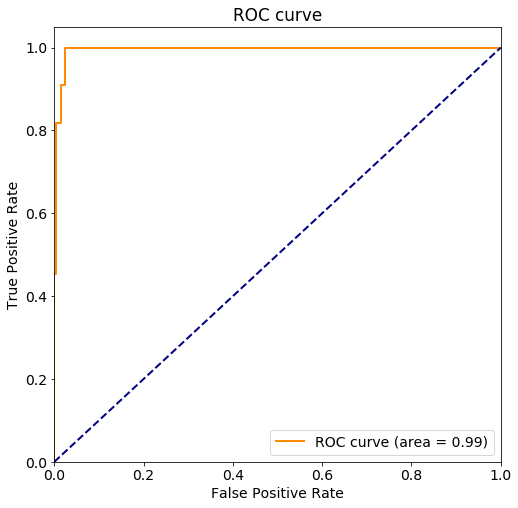

In [34]:
plot_roc_curve(y_te_nn, y_hat_test)

In [37]:
def plot_pr_curve(y, y_hat):
    y_hat = np.array(y_hat[0])
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y[:, 0], y_hat[:, 0])
    pr_auc = sklearn.metrics.auc(recall, precision)
    f1 = sklearn.metrics.f1_score(y[:, 0], np.round(y_hat[:, 0]))
    
    plt.figure(figsize=(8,8))
    plt.rcParams.update({'font.size': 14})
    plt.plot(recall, precision, color='darkorange',
             lw=2, label='PR curve (area = {0}, $F_1 = {1}$'.format(
              round(pr_auc, 2), round(f1, 2)))

    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('$F_1 = {0:0.1f}$'.format(f_score), xy=(0.87, y[45] + 0.02))

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower left")
    plt.show()

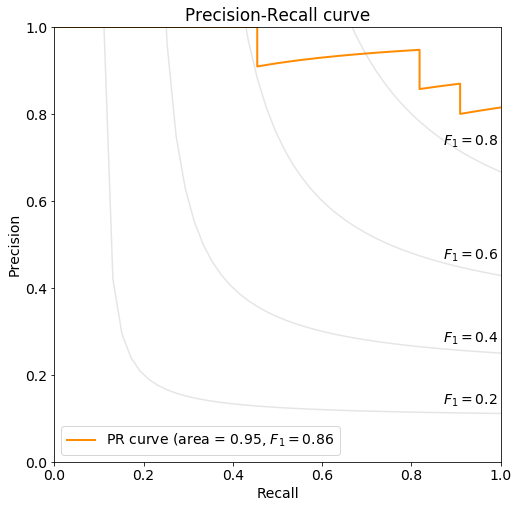

In [38]:
plot_pr_curve(y_te_nn, y_hat_test)